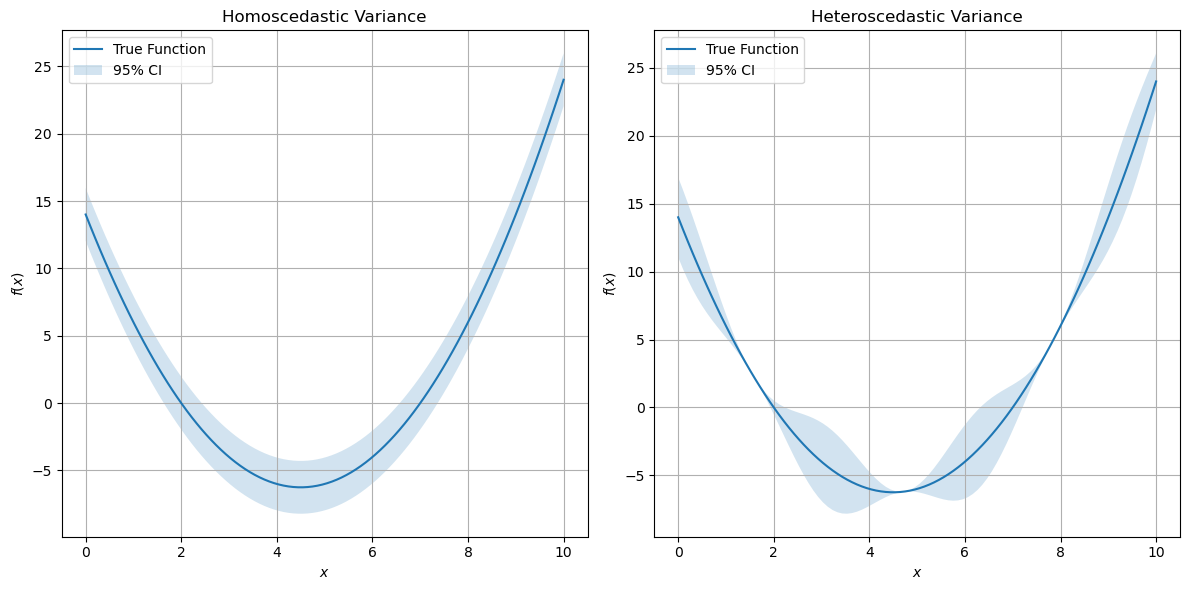

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the number of samples for plotting
samples = 100

# True functions without noise
def true_homoscedastic_func(x):
    return x**2 - 9*x + 14

def true_heteroscedastic_func(x):
    return x**2 - 9*x + 14

# Generate x values
x_values = np.linspace(0, 10, samples)

# Evaluate the true functions
y_true_homo = true_homoscedastic_func(x_values)
y_true_hetero = true_heteroscedastic_func(x_values)

# Generate the noise
homo_noise = norm(0, 2).rvs(samples)
hetero_noise = norm(0, np.abs(4 * np.cos(x_values)**2)).rvs(samples)

# 95% confidence interval for noise
# Define lambda functions for the standard deviations
sigma_homo = lambda x: 10  # Homoscedastic variance is constant
sigma_hetero = lambda x: np.abs(15 * np.cos(x)**2)  # Heteroscedastic variance depends on x

# Define lambda functions for the 95% confidence intervals
homo_conf_int = lambda x: 1.96 * sigma_homo(x) / np.sqrt(samples)
hetero_conf_int = lambda x: 1.96 * sigma_hetero(x) / np.sqrt(samples)

# Apply the lambda functions to the x_values
homo_conf_values = homo_conf_int(x_values)
hetero_conf_values = hetero_conf_int(x_values)

# Plotting the Homoscedastic function
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, y_true_homo, label='True Function')
plt.fill_between(x_values, y_true_homo - homo_conf_values, y_true_homo + homo_conf_values, alpha=0.2, label='95% CI')
plt.title('Homoscedastic Variance')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)

# Plotting the Heteroscedastic function
plt.subplot(1, 2, 2)
plt.plot(x_values, y_true_hetero, label='True Function')
plt.fill_between(x_values, y_true_hetero - hetero_conf_values, y_true_hetero + hetero_conf_values, alpha=0.2, label='95% CI')
plt.title('Heteroscedastic Variance')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
# Function to save the plots as separate PNG files
def save_plots(x, y_true, conf_int, title, file_name):
    plt.figure(figsize=(6, 4))
    plt.plot(x, y_true, label='True Function')
    plt.fill_between(x, y_true - conf_int(x), y_true + conf_int(x), alpha=0.2, label='95% CI')
    plt.title(title)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"figs/{file_name}.png")
    plt.close()

# Save the Homoscedastic function plot
save_plots(x_values, y_true_homo, homo_conf_int, 'Homoscedastic Variance', 'homoscedastic_variance')

# Save the Heteroscedastic function plot
save_plots(x_values, y_true_hetero, hetero_conf_int, 'Heteroscedastic Variance', 'heteroscedastic_variance')
